<a href="https://colab.research.google.com/github/Saket22-CS/Saket-Infosys-Nov24/blob/main/FutureCart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Mount Google Drive (only needed for Google Colab)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Specify the file paths
product_data_path = '/content/drive/My Drive/Colab Notebooks/ProductA.xlsx'
google_clicks_path = '/content/drive/My Drive/Colab Notebooks/ProductA_google_clicks.xlsx'
fb_impressions_path = '/content/drive/My Drive/Colab Notebooks/ProductA_fb_impressions.xlsx'


In [4]:
# Load the Excel files
product_data = pd.read_excel(product_data_path)
google_clicks = pd.read_excel(google_clicks_path)
fb_impressions = pd.read_excel(fb_impressions_path)

In [5]:
# Merge the data on 'Day Index'
merged_data = pd.merge(product_data, google_clicks, on='Day Index')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index')

In [6]:
# Check for missing values and handle them (imputation/elimination)
missing_values = merged_data.isnull().sum()
merged_data_cleaned = merged_data.dropna()

In [7]:
# Display missing values
print("Missing values per column:")
print(missing_values)

Missing values per column:
Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64


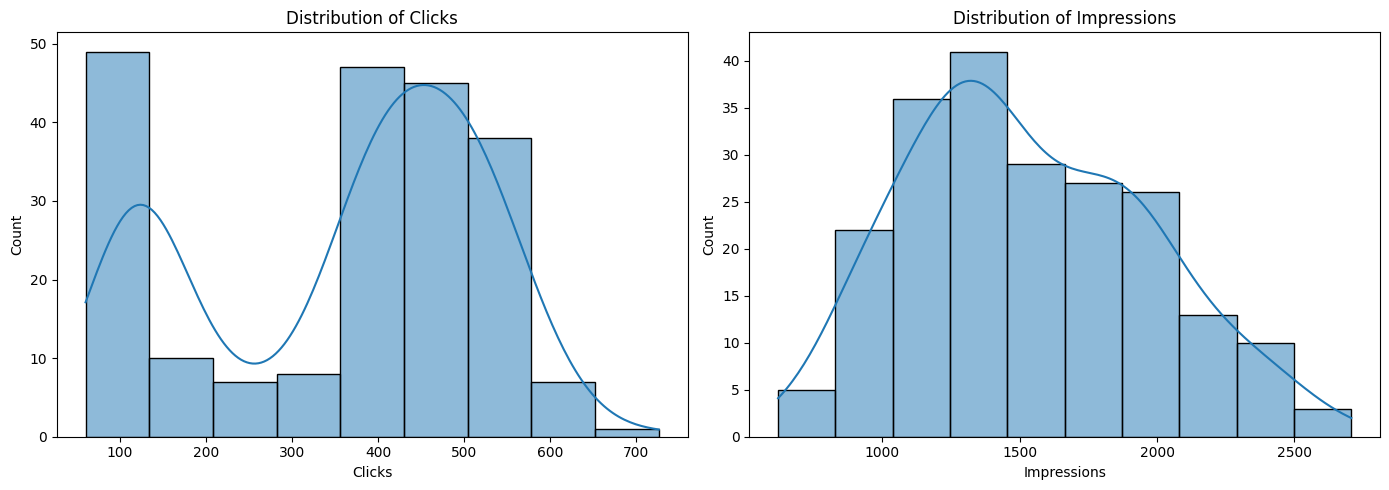

In [8]:
# Plot distribution plots for independent variables (Clicks and Impressions)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(merged_data_cleaned['Clicks'], kde=True)
plt.title('Distribution of Clicks')

plt.subplot(1, 2, 2)
sns.histplot(merged_data_cleaned['Impressions'], kde=True)
plt.title('Distribution of Impressions')

plt.tight_layout()
plt.show()

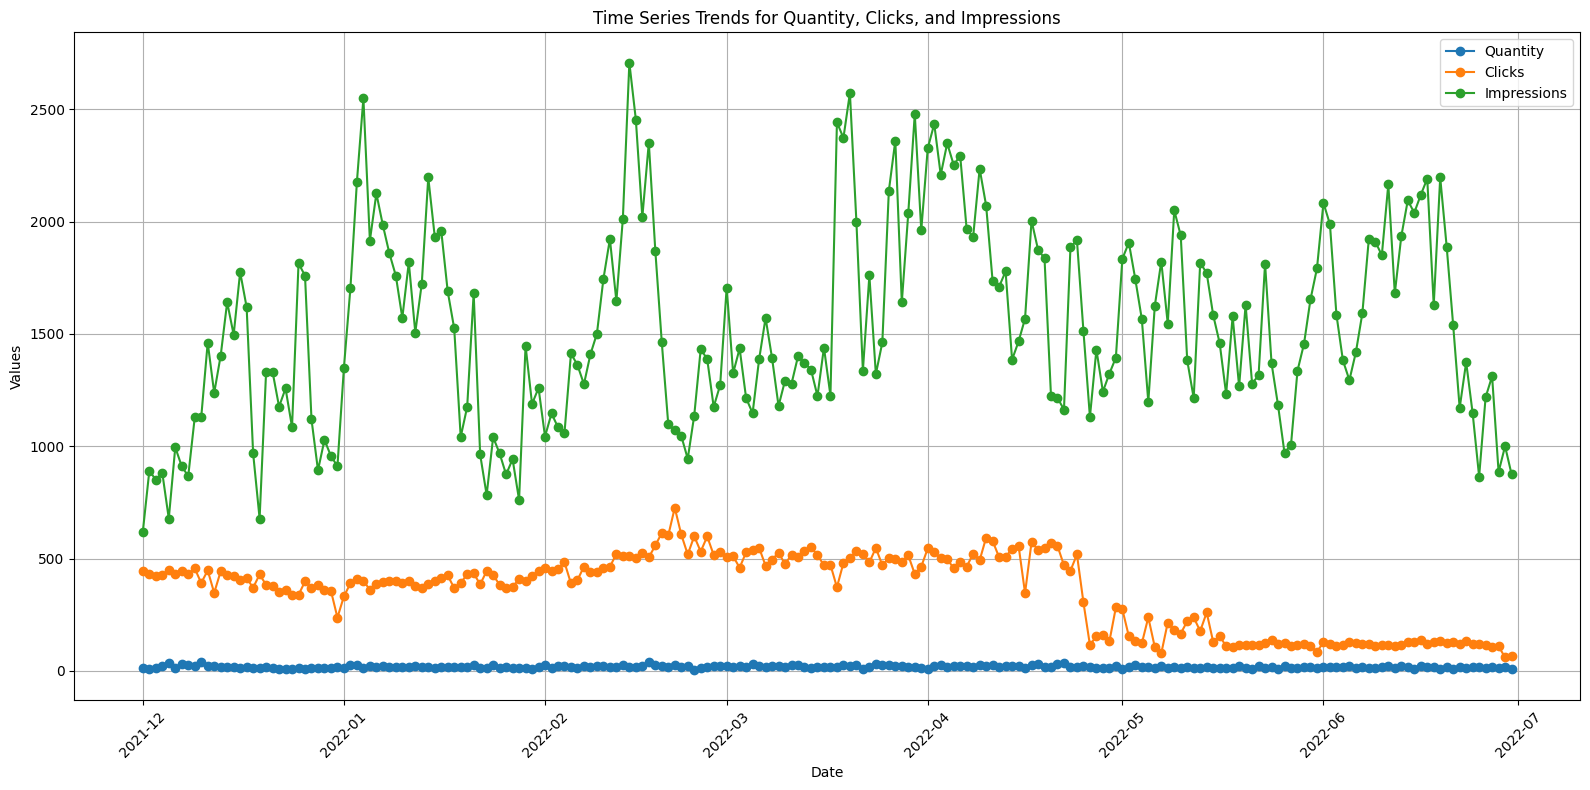

In [9]:
# Plot time series trends for Quantity, Clicks, and Impressions
plt.figure(figsize=(16, 8))
plt.plot(merged_data_cleaned['Day Index'], merged_data_cleaned['Quantity'], label='Quantity', marker='o')
plt.plot(merged_data_cleaned['Day Index'], merged_data_cleaned['Clicks'], label='Clicks', marker='o')
plt.plot(merged_data_cleaned['Day Index'], merged_data_cleaned['Impressions'], label='Impressions', marker='o')
plt.title('Time Series Trends for Quantity, Clicks, and Impressions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

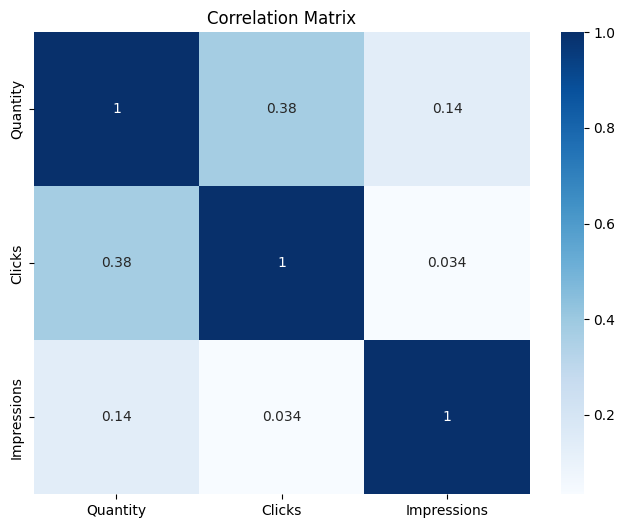

In [10]:
# Correlation matrix
correlation_matrix = merged_data_cleaned[['Quantity', 'Clicks', 'Impressions']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Display a few rows of the cleaned data
print("Sample of the cleaned data:")
print(merged_data_cleaned.head())

Sample of the cleaned data:
   Day Index  Quantity  Clicks  Impressions
0 2021-12-01        14     445          620
1 2021-12-02        10     433          890
2 2021-12-03        13     424          851
3 2021-12-04        22     427          881
4 2021-12-05        33     451          678
